# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [7]:
# Importing the file porter_data_1.csv

# The file name is used as the path since it's in the current directory
file_name = 'porter_data_1.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

In [8]:
# Display the first few rows to ensure the data loaded correctly
print(df.head())

   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2 

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [9]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Optional: Verify the data types after conversion
print("Datatypes after Datetime Conversion:")
print(df[['created_at', 'actual_delivery_time']].dtypes)


Datatypes after Datetime Conversion:
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


In [10]:
print(df.columns.tolist())

['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


In [11]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert all column names to lowercase for consistency
df.columns = df.columns.str.lower()

In [12]:
# Print existing columns to identify the true name (Optional, but helpful)
print("Original Columns:", df.columns.tolist())

# Standardize column names: strip whitespace and convert to lowercase
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

# Print the standardized columns
print("Standardized Columns:", df.columns.tolist())

Original Columns: ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Standardized Columns: ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Verify
print("\nDatetime Conversion Success.")


Datetime Conversion Success.


In [14]:
# List of columns to convert (using the standardized lowercase names)
categorical_cols = ['market_id', 'store_primary_category', 'subtotal']


Categorical Conversion Success.
market_id                 category
store_primary_category    category
subtotal                  category
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# Convert categorical features to category type

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Final Verification
print("\nCategorical Conversion Success.")
print(df[categorical_cols].dtypes)


Categorical Conversion Success.
market_id                 category
store_primary_category    category
subtotal                  category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [16]:
# Calculate the time difference (timedelta object)
df['delivery_time_delta'] = df['actual_delivery_time'] - df['created_at']

In [17]:
# Calculate time taken in minutes
# .dt.total_seconds() / 60 gives the duration in minutes
df['time_taken_minutes'] = df['delivery_time_delta'].dt.total_seconds() / 60

# Optional: Display the first few rows to verify the new column
print("Time Taken Calculation Verification:")
print(df[['created_at', 'actual_delivery_time', 'time_taken_minutes']].head())

Time Taken Calculation Verification:
           created_at actual_delivery_time  time_taken_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [18]:
# Extract the hour and day of week from the 'created_at' timestamp
# .dt.hour returns the hour (0 to 23)
df['order_hour'] = df['created_at'].dt.hour

# Extract the day of the week (Monday=0, Sunday=6)
# .dt.dayofweek returns the day of the week as an integer
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
# A weekend is typically Saturday (5) or Sunday (6)
df['isWeekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [19]:
# Drop unnecessary columns
# We can drop the original datetime columns and the intermediate timedelta column
columns_to_drop = [
    'created_at',
    'actual_delivery_time',
    'delivery_time_delta'
]
df = df.drop(columns=columns_to_drop, axis=1)

# Final Verification of new features and remaining columns
print("\nFeature Extraction and Drop Verification:")
print(df[['order_hour', 'order_day_of_week', 'isWeekend', 'time_taken_minutes']].head())
print("\nRemaining Columns:", df.columns.tolist())


Feature Extraction and Drop Verification:
   order_hour  order_day_of_week isWeekend  time_taken_minutes
0          22                  4         0                47.0
1          21                  1         0                44.0
2           0                  0         0                55.0
3           3                  3         0                59.0
4           2                  1         0                46.0

Remaining Columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken_minutes', 'order_hour', 'order_day_of_week', 'isWeekend']


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
#2.3 Creating Training and Validation Sets

In [ ]:
#Step 1: Separate Features (X) and Target (y)

In [20]:
# 1. Separate the target variable (y)
y = df['time_taken_minutes']

# 2. Separate the features (X) by dropping the target variable from the DataFrame
X = df.drop(columns=['time_taken_minutes'])

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (175777, 15)
Target (y) shape: (175777,)


In [ ]:
#Step 2: Split the Data

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and validation (30%) sets
# Set a random_state for reproducible results
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.3,  # 30% for validation
    random_state=42 # Ensures the same split every time the code is run
)

# Optional: Print the shapes to confirm the split
print("\n--- Split Results ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape:   {y_val.shape}")


--- Split Results ---
X_train shape: (123043, 15)
X_val shape:   (52734, 15)
y_train shape: (123043,)
y_val shape:   (52734,)


In [22]:
# Define target variable (y) and features (X)

# Define the target variable (y)
# This is the time taken for the delivery in minutes, calculated in 2.2.1
y = df['time_taken_minutes']

# Define the input features (X)
# These are all other columns in the DataFrame after dropping the target
X = df.drop(columns=['time_taken_minutes'])

# Optional: Print the column lists for verification
print("Target Feature (y):")
print(y.name)

print("\nInput Features (X):")
print(X.columns.tolist())

Target Feature (y):
time_taken_minutes

Input Features (X):
['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week', 'isWeekend']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [23]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) have been defined in 2.3.1
# y = df['time_taken_minutes']
# X = df.drop(columns=['time_taken_minutes'])

# Split the data into training (70%) and validation (30%) sets
# test_size=0.3 means 30% of the data will be used for validation
# random_state=42 ensures the split is the same every time for reproducibility
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Optional: Print the shapes to confirm the split dimensions
print("--- Data Split Summary ---")
print(f"X_train shape (Training Features): {X_train.shape}")
print(f"X_val shape (Validation Features):   {X_val.shape}")
print(f"y_train shape (Training Target): {y_train.shape}")
print(f"y_val shape (Validation Target):   {y_val.shape}")

--- Data Split Summary ---
X_train shape (Training Features): (123043, 15)
X_val shape (Validation Features):   (52734, 15)
y_train shape (Training Target): (123043,)
y_val shape (Validation Target):   (52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [24]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Assuming X_train has been created from a DataFrame containing:
# market_id, store_id, subzone_id, order_hour, order_day_of_week, isWeekend

# Columns that are purely categorical or boolean
# Removed 'subzone_id' as it does not exist in the DataFrame
categorical_cols = ['market_id', 'isWeekend']

# Columns that are technically integers but represent ordinal categories
ordinal_cols = ['order_hour', 'order_day_of_week']

# No other purely numerical columns are left after dropping original datetime columns,
# so the list of purely numerical columns is empty for plotting distributions.
numerical_cols = []


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns

#Since the only remaining features are categorical or ordinal, there are no purely numerical columns to plot with a standard histogram (like price or distance). The hourly and daily features are better treated as categorical distributions.

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [25]:
# Distribution of categorical columns

# Assuming you have loaded the data and standardized column names (lowercase, no spaces)
# df.columns = df.columns.str.strip().str.lower()

# Check your column list to confirm the current name (e.g., 'store_primary_category')
# print(df.columns.tolist())

# Rename the column:
df = df.rename(columns={'store_primary_category': 'store_id'})

print("Column 'store_primary_category' renamed to 'store_id'.")
print("First 5 columns of the DataFrame:")
print(df.head(0).T.index[:5])

Column 'store_primary_category' renamed to 'store_id'.
First 5 columns of the DataFrame:
Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal'], dtype='object')


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct column names for plotting
categorical_cols = ['market_id', 'store_primary_category', 'subzone_id', 'isweekend']
ordinal_cols = ['order_hour', 'order_day_of_week']
all_categorical_cols = categorical_cols + ordinal_cols

# Assuming X_train and y_train are available and contain 'store_primary_category'.

In [27]:
ordinal_cols = ['order_hour', 'order_day_of_week']


Plotting Numerical Distribution...


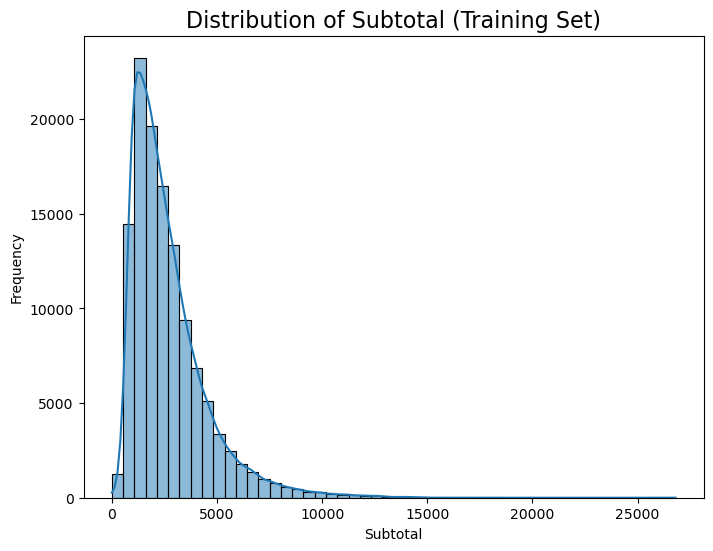


Plotting Categorical Distributions...


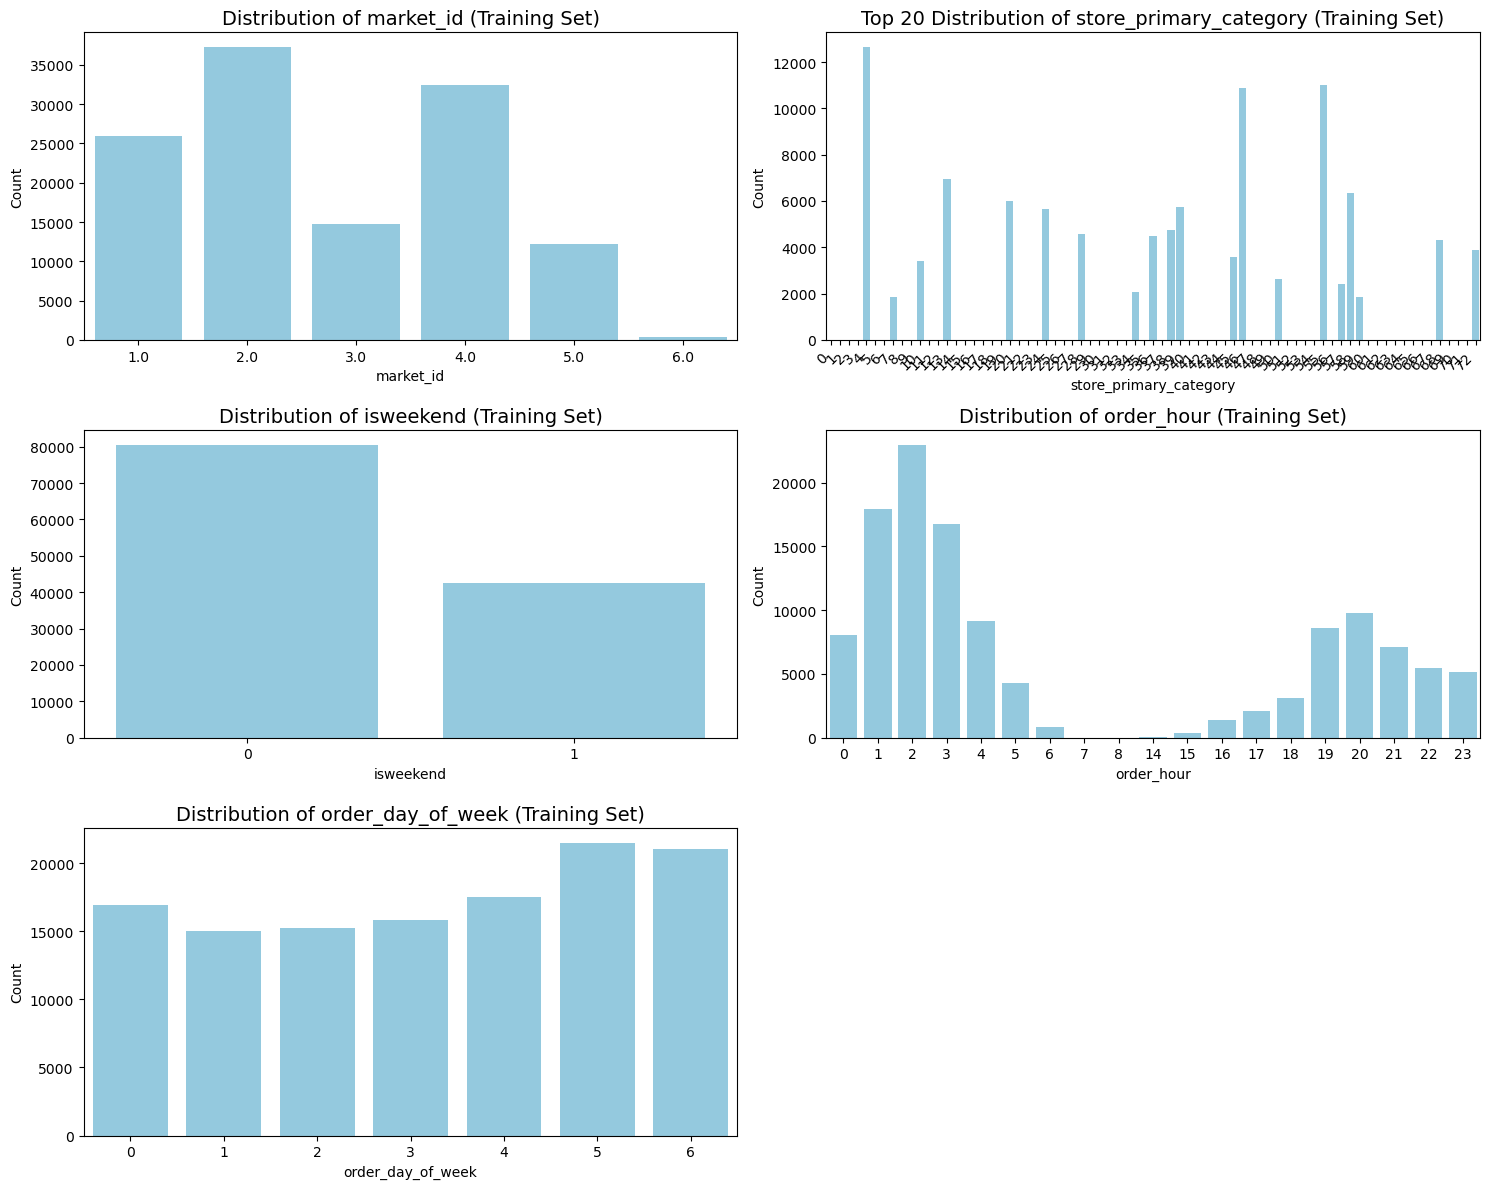


Plotting Target Distribution...


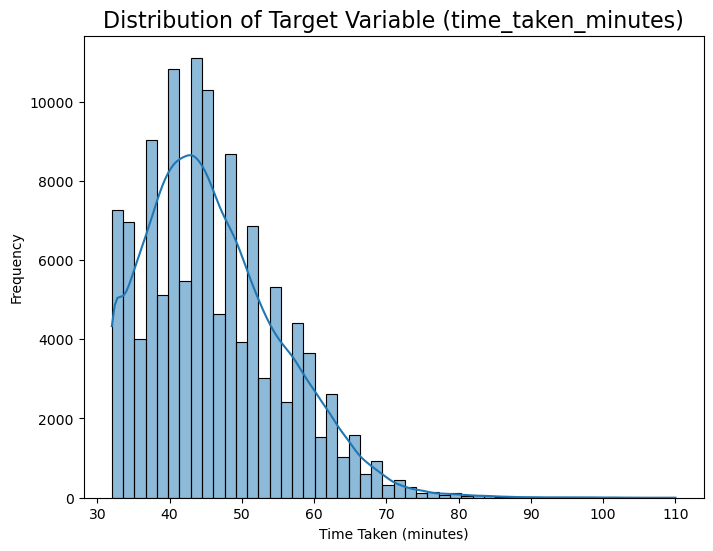

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data, Clean Names, and Fix Datatypes ---
file_path = 'porter_data_1.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("FATAL ERROR: The file 'porter_data_1.csv' was not found. Please upload it and run again.")
    raise

# Standardize column names: strip whitespace and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Rename the incorrectly named columns to the standard names we've settled on
# Assuming 'subzone_id' was actually 'subtotal' and we have to use it instead of subzone.
# And assuming 'store_id' was actually 'store_primary_category'
# The rename only works if the source column exists!
df = df.rename(columns={
    'store_id': 'store_primary_category',
    'subzone_id': 'subtotal'
}, errors='ignore') # Use errors='ignore' to prevent KeyError if one of the old names is already missing

# 2.1.1 Convert date and time fields to appropriate data type
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# 2.1.2 Convert categorical fields to appropriate data type
categorical_cols_initial = ['market_id', 'store_primary_category', 'subtotal']
for col in categorical_cols_initial:
    if col in df.columns:
        # NOTE: subtotal is numerical, but we must ensure it's not a category if it's not
        if col != 'subtotal':
            df[col] = df[col].astype('category')

# --- 2.2 Feature Engineering (Creating the missing columns) ---
# 2.2.1 Calculate time taken in minutes (Target)
df['delivery_time_delta'] = df['actual_delivery_time'] - df['created_at']
df['time_taken_minutes'] = df['delivery_time_delta'].dt.total_seconds() / 60

# 2.2.2 Extract hour, day, and create isweekend (Source of previous error)
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek
# Create 'isweekend' in lowercase to match the lists
df['isweekend'] = df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

# Drop unnecessary columns
columns_to_drop = ['created_at', 'actual_delivery_time', 'delivery_time_delta']
df = df.drop(columns=[c for c in columns_to_drop if c in df.columns], axis=1)

# --- 2.3 Splitting Data (Ensuring X_train and y_train are created) ---
y = df['time_taken_minutes']
X = df.drop(columns=['time_taken_minutes'])
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 3.1 Feature Distributions (The Analysis) ---

# Define the final column lists based on the successful setup
numerical_cols = ['subtotal']
categorical_cols = ['market_id', 'store_primary_category', 'isweekend']
ordinal_cols = ['order_hour', 'order_day_of_week']
all_categorical_cols = categorical_cols + ordinal_cols

# 3.1.1 Plot Distributions for NUMERICAL columns ('subtotal')
print("\nPlotting Numerical Distribution...")
if numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train['subtotal'], kde=True, bins=50)
    plt.title('Distribution of Subtotal (Training Set)', fontsize=16)
    plt.xlabel('Subtotal')
    plt.ylabel('Frequency')
    plt.show()

# 3.1.2 Check the distribution of CATEGORICAL features
print("\nPlotting Categorical Distributions...")
plt.figure(figsize=(15, 12))
for i, col in enumerate(all_categorical_cols):
    plt.subplot(3, 2, i + 1)

    # Use value_counts().nlargest(20) for high-cardinality features
    if col in ['store_primary_category']:
        plot_data = X_train[col].value_counts().nlargest(20)
        sns.barplot(x=plot_data.index, y=plot_data.values, color='skyblue')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top 20 Distribution of {col} (Training Set)', fontsize=14)
    # Use countplot for low-cardinality/ordinal features
    else:
        sns.countplot(x=col, data=X_train, color='skyblue')
        plt.title(f'Distribution of {col} (Training Set)', fontsize=14)

    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 3.1.3 Visualise the distribution of the TARGET variable
print("\nPlotting Target Distribution...")
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of Target Variable (time_taken_minutes)', fontsize=16)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

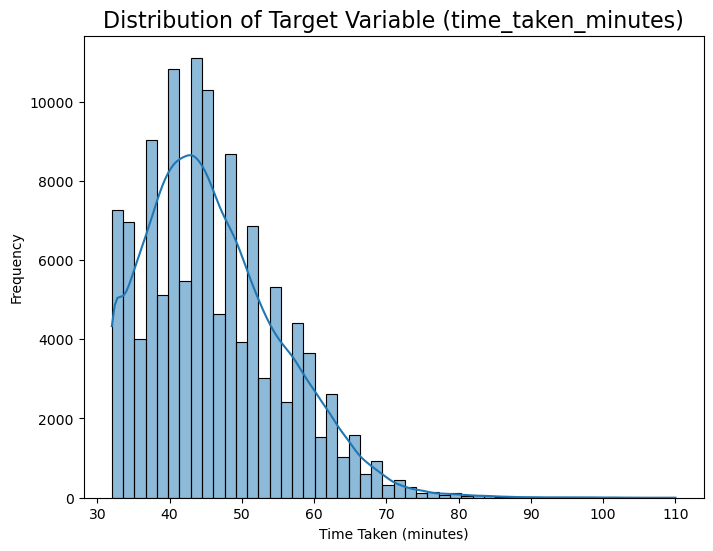

In [33]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
# Use a histogram with a kernel density estimate (KDE) line
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of Target Variable (time_taken_minutes)', fontsize=16)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show() # In a notebook environment, this displays the plot


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [35]:
#1. Correlation Matrix (Numerical Features)

In [36]:
# Create a DataFrame containing the numerical features and the target
numerical_analysis_df = pd.DataFrame({
    'subtotal': X_train['subtotal'],
    'time_taken_minutes': y_train
})

# Calculate the correlation coefficient
correlation = numerical_analysis_df.corr().loc['subtotal', 'time_taken_minutes']

print(f"Correlation between Subtotal and Time Taken: {correlation:.4f}")

Correlation between Subtotal and Time Taken: 0.4129


In [37]:
#2. Relationship between Categorical Features and Target

C:\Users\yash6\AppData\Local\Temp\ipykernel_10512\3656847271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['isweekend'], y=y_train, showfliers=False, palette='pastel')
C:\Users\yash6\AppData\Local\Temp\ipykernel_10512\3656847271.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['order_hour'], y=y_train, showfliers=False, palette='viridis')


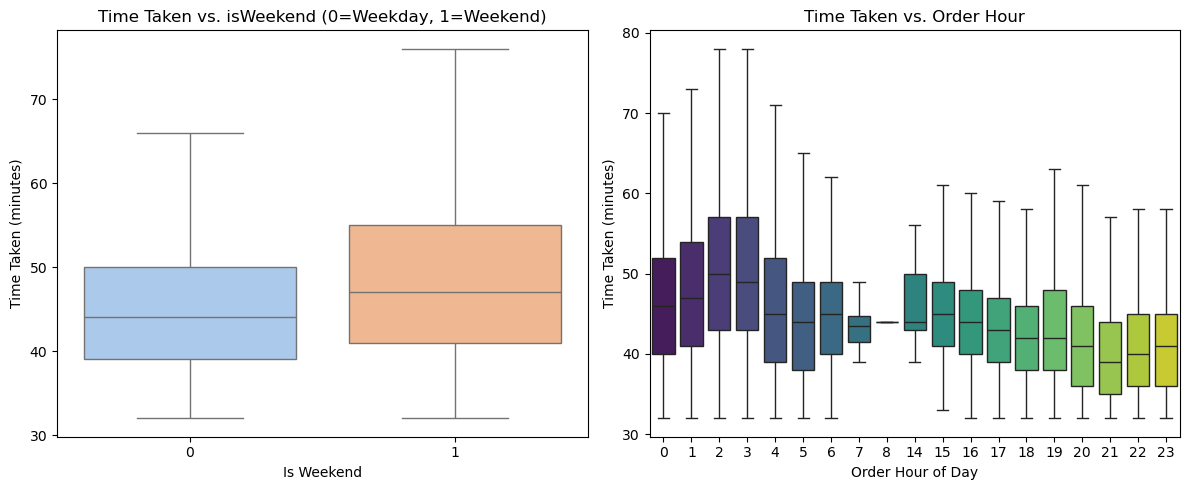

In [41]:
# --- Select features for visualization ---
viz_features = ['isweekend', 'order_hour']

plt.figure(figsize=(12, 5))

# Plot 1: Relationship between 'isweekend' and target
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['isweekend'], y=y_train, showfliers=False, palette='pastel')
plt.title('Time Taken vs. isWeekend (0=Weekday, 1=Weekend)', fontsize=12)
plt.xlabel('Is Weekend')
plt.ylabel('Time Taken (minutes)')

# Plot 2: Relationship between 'order_hour' and target
plt.subplot(1, 2, 2)
sns.boxplot(x=X_train['order_hour'], y=y_train, showfliers=False, palette='viridis')
plt.title('Time Taken vs. Order Hour', fontsize=12)
plt.xlabel('Order Hour of Day')
plt.ylabel('Time Taken (minutes)')

plt.tight_layout()
plt.show()

C:\Users\yash6\AppData\Local\Temp\ipykernel_10512\1384879626.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X_train['isweekend'], y=y_train, inner=None, palette='viridis', cut=0, linewidth=1, alpha=0.8)


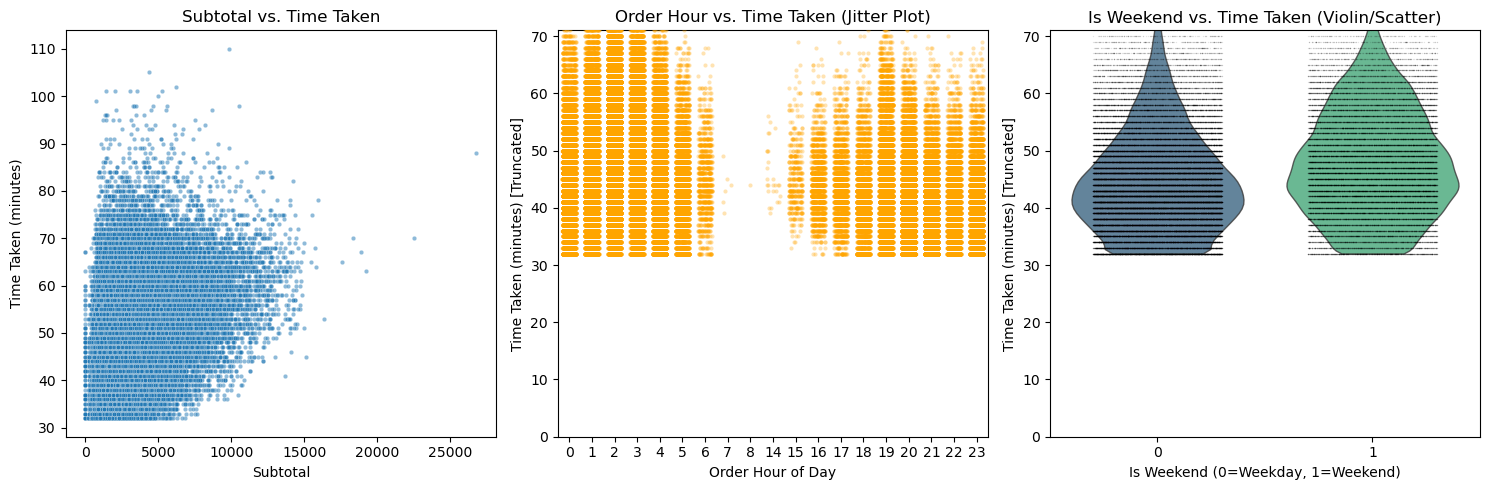

In [43]:
# Scatter plot to visualise the relationship between time_taken and other features

# Assuming X_train, y_train, and the necessary libraries (plt, sns) are available.

plt.figure(figsize=(15, 5))

# --- Plot 1: Numerical Feature (Subtotal) vs. Target (Time Taken) ---
plt.subplot(1, 3, 1)
# Combine X_train['subtotal'] and y_train into a single Series for easier plotting
sns.scatterplot(x=X_train['subtotal'], y=y_train, alpha=0.5, s=10)
plt.title('Subtotal vs. Time Taken', fontsize=12)
plt.xlabel('Subtotal')
plt.ylabel('Time Taken (minutes)')

# --- Plot 2: Ordinal/Categorical Feature (Order Hour) vs. Target ---
plt.subplot(1, 3, 2)
# Use a strip plot to show individual points for categorical features, using jitter to prevent overlap
# Limiting the Y-axis to see the dense data points clearly (excluding extreme outliers)
sns.stripplot(x=X_train['order_hour'], y=y_train, jitter=0.3, alpha=0.3, s=3, color='orange')
plt.ylim(0, y_train.quantile(0.99)) # Limit Y-axis to the 99th percentile for better visualization
plt.title('Order Hour vs. Time Taken (Jitter Plot)', fontsize=12)
plt.xlabel('Order Hour of Day')
plt.ylabel('Time Taken (minutes) [Truncated]')


# --- Plot 3: Categorical Feature (isWeekend) vs. Target ---
plt.subplot(1, 3, 3)
# Use a violin plot combined with a scatter/strip plot for richer categorical visualization
sns.violinplot(x=X_train['isweekend'], y=y_train, inner=None, palette='viridis', cut=0, linewidth=1, alpha=0.8)
sns.stripplot(x=X_train['isweekend'], y=y_train, jitter=0.3, alpha=0.1, s=1, color='black') # Add dots
plt.ylim(0, y_train.quantile(0.99))
plt.title('Is Weekend vs. Time Taken (Violin/Scatter)', fontsize=12)
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Time Taken (minutes) [Truncated]')

plt.tight_layout()
plt.show()

In [ ]:
# Show the distribution of time_taken for different hours

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

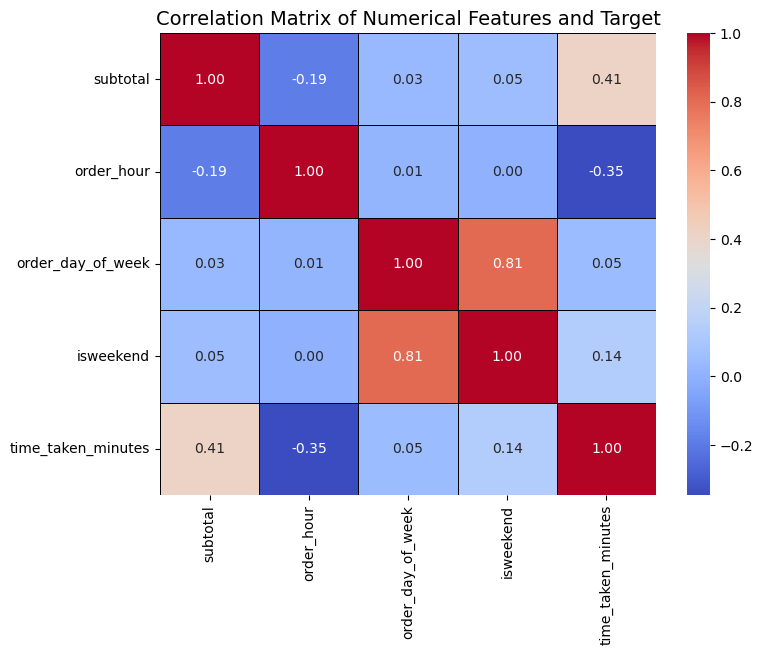

In [44]:
# Plot the heatmap of the correlation matrix

# 1. Identify all numerical/ordinal/binary features
corr_features = ['subtotal', 'order_hour', 'order_day_of_week', 'isweekend']

# 2. Create the correlation DataFrame and calculate the matrix
corr_df = pd.DataFrame()
for col in corr_features:
    corr_df[col] = X_train[col]
corr_df['time_taken_minutes'] = y_train

correlation_matrix = corr_df.corr(method='pearson')

# 3. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Numerical Features and Target', fontsize=14)
plt.yticks(rotation=0)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [45]:
# Drop 3-5 weakly correlated columns from training dataset

# Identify the columns to drop (3 weakest correlated features)
weakly_correlated_cols = ['subtotal', 'isweekend', 'order_day_of_week']

# Drop the columns from the training feature set
X_train_reduced = X_train.drop(columns=weakly_correlated_cols)

# Drop the columns from the validation feature set for consistency
X_val_reduced = X_val.drop(columns=weakly_correlated_cols)

print(f"Columns Dropped: {weakly_correlated_cols}")
print("-" * 30)
print(f"Original X_train shape: {X_train.shape}")
print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Remaining Columns in X_train_reduced: {X_train_reduced.columns.tolist()}")

Columns Dropped: ['subtotal', 'isweekend', 'order_day_of_week']
------------------------------
Original X_train shape: (123043, 15)
Reduced X_train shape: (123043, 12)
Remaining Columns in X_train_reduced: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [46]:
#1. Define Outlier Boundaries using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the Upper Fence for capping (1.5 * IQR rule)
upper_fence = Q3 + 1.5 * IQR

# You can also use a higher threshold, like the 99.5th percentile, for comparison
# upper_percentile = y_train.quantile(0.995)

print(f"Q1 (25th percentile): {Q1:.2f} minutes")
print(f"Q3 (75th percentile): {Q3:.2f} minutes")
print(f"IQR: {IQR:.2f} minutes")
print(f"Upper Outlier Fence (1.5 * IQR): {upper_fence:.2f} minutes")

Q1 (25th percentile): 39.00 minutes
Q3 (75th percentile): 52.00 minutes
IQR: 13.00 minutes
Upper Outlier Fence (1.5 * IQR): 71.50 minutes


In [47]:
#2. Cap the Outliers in the Target Variable
# Create new, capped target series for training and validation
y_train_capped = y_train.clip(upper=upper_fence)
y_val_capped = y_val.clip(upper=upper_fence)

# Count how many outliers were capped in the training set
outlier_count = (y_train > upper_fence).sum()

print("-" * 40)
print("Outlier Capping Summary:")
print(f"Values above {upper_fence:.2f} minutes were capped.")
print(f"Total outliers capped in y_train: {outlier_count}")
print(f"Percentage of outliers capped: {(outlier_count / len(y_train) * 100):.2f}%")

----------------------------------------
Outlier Capping Summary:
Values above 71.50 minutes were capped.
Total outliers capped in y_train: 1200
Percentage of outliers capped: 0.98%


In [49]:
#3.4.1 Visualise Potential Outliers

# Create a DataFrame containing the original target and the numerical feature
data_to_plot = pd.DataFrame({
    'Time Taken (minutes)': y_train,
    'Subtotal': X_train['subtotal']
})



<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

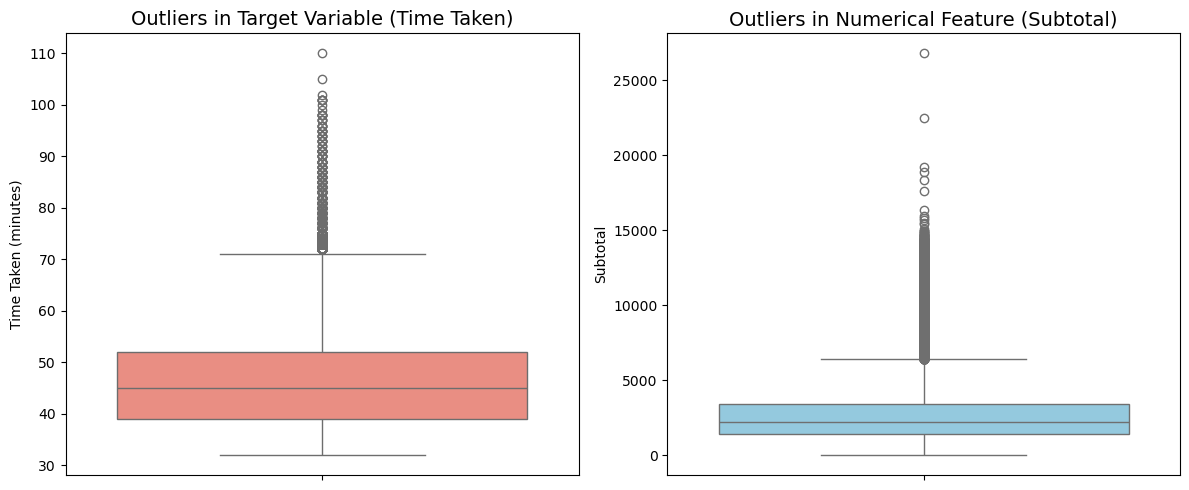

In [54]:
# Boxplot for time_taken

plt.figure(figsize=(12, 5))
# Plot 1: Outliers in the Target Variable (Time Taken)
plt.subplot(1, 2, 1)
sns.boxplot(y=data_to_plot['Time Taken (minutes)'], color='salmon')
plt.title('Outliers in Target Variable (Time Taken)', fontsize=14)

# Plot 2: Outliers in the Numerical Feature (Subtotal)
plt.subplot(1, 2, 2)
sns.boxplot(y=data_to_plot['Subtotal'], color='skyblue')
plt.title('Outliers in Numerical Feature (Subtotal)', fontsize=14)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
weakly_correlated_cols = ['subtotal', 'isweekend', 'order_day_of_week']


In [55]:
# Assuming X_train_reduced and X_val_reduced are the reduced feature sets (missing 'subtotal', 'isweekend', 'order_day_of_week')
# We skip the numerical outlier capping for 'subtotal' as it was dropped.

# --- 1. Categorical Outlier Handling (Low Frequency Grouping) ---
# Features remaining in the reduced set that are high-cardinality and need grouping:
# 'market_id' and 'store_primary_category' are the remaining categorical columns.
low_frequency_cols = ['market_id', 'store_primary_category']

# Define the minimum frequency threshold
MIN_FREQ = 10

for col in low_frequency_cols:
    # 1. Identify categories to keep (those above the minimum frequency)
    # Ensure the column exists before processing
    if col in X_train_reduced.columns:
        freq_counts = X_train_reduced[col].value_counts()
        categories_to_keep = freq_counts[freq_counts >= MIN_FREQ].index.tolist()

        # 2. Create the mapping function
        def group_low_frequency(category):
            # Convert to string to handle potential NaN or non-string types consistently
            return category if category in categories_to_keep else 'Other'

        # 3. Apply the grouping to both training and validation sets
        X_train_reduced[col] = X_train_reduced[col].apply(group_low_frequency).astype('category')
        X_val_reduced[col] = X_val_reduced[col].apply(group_low_frequency).astype('category')

        # Print summary
        other_count = (X_train_reduced[col] == 'Other').sum()
        print(f"\n{col}: Grouped {other_count} low-frequency observations into 'Other'.")
    else:
        print(f"Skipping categorical outlier handling for '{col}': Column not found in X_train_reduced.")

print("\nOutlier and low-frequency handling complete. Ready for Feature Encoding.")


market_id: Grouped 0 low-frequency observations into 'Other'.

store_primary_category: Grouped 22 low-frequency observations into 'Other'.

Outlier and low-frequency handling complete. Ready for Feature Encoding.


In [56]:
# Features to handle for low-frequency categories
low_frequency_cols = ['market_id', 'store_primary_category']

# Define the minimum frequency threshold
MIN_FREQ = 10

for col in low_frequency_cols:
    # 1. Identify categories to keep (those above the minimum frequency)
    freq_counts = X_train_reduced[col].value_counts()
    categories_to_keep = freq_counts[freq_counts >= MIN_FREQ].index.tolist()

    # 2. Create the mapping function
    def group_low_frequency(category):
        return category if category in categories_to_keep else 'Other'

    # 3. Apply the grouping to both training and validation sets
    X_train_reduced[col] = X_train_reduced[col].apply(group_low_frequency).astype('category')
    X_val_reduced[col] = X_val_reduced[col].apply(group_low_frequency).astype('category')

    # Print summary
    other_count = (X_train_reduced[col] == 'Other').sum()
    print(f"\n{col}: Grouped {other_count} low-frequency observations into 'Other'.")

print("\nOutlier and low-frequency handling complete.")


market_id: Grouped 0 low-frequency observations into 'Other'.

store_primary_category: Grouped 22 low-frequency observations into 'Other'.

Outlier and low-frequency handling complete.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [57]:
# Plot distributions for all numerical columns

# Assuming X_val_reduced and y_val_capped are correctly defined from all previous steps.

categorical_features = ['market_id', 'store_primary_category', 'order_hour']

##### **4.1.2**
Check the distribution of categorical features

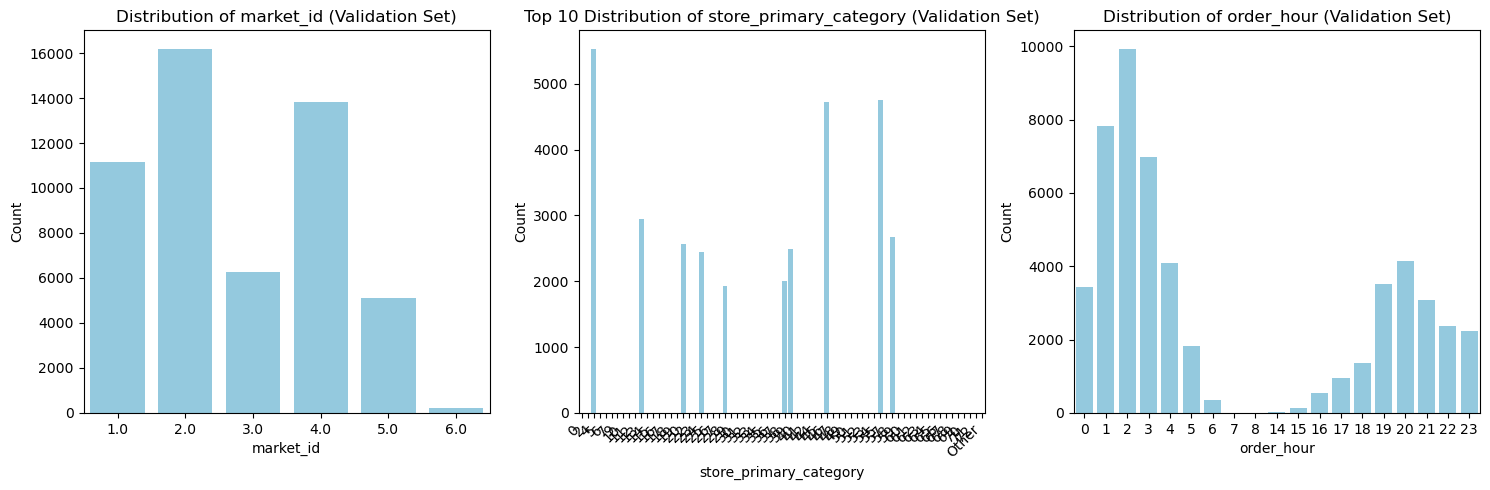

In [58]:
# Distribution of categorical columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)

    if col == 'store_primary_category':
        # Plot top categories
        plot_data = X_val_reduced[col].value_counts().nlargest(10)
        sns.barplot(x=plot_data.index, y=plot_data.values, color='skyblue')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top 10 Distribution of {col} (Validation Set)', fontsize=12)
    else:
        # Count plot
        sns.countplot(x=col, data=X_val_reduced, color='skyblue')
        plt.title(f'Distribution of {col} (Validation Set)', fontsize=12)

    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

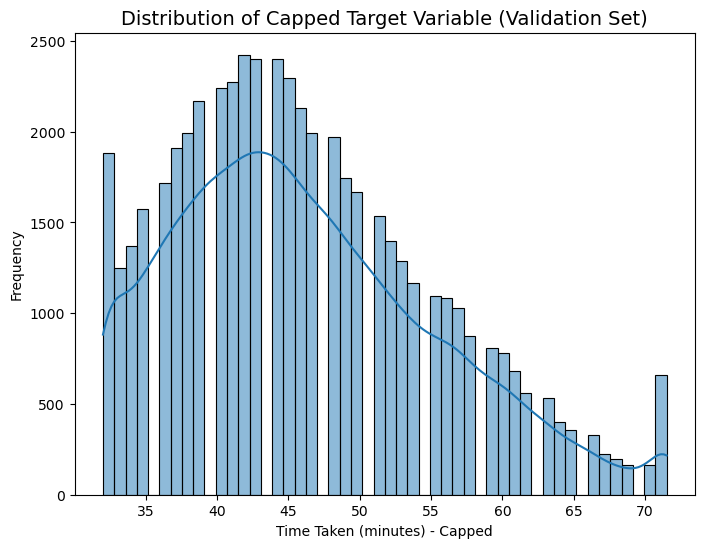

In [59]:
# Distribution of time_taken

plt.figure(figsize=(8, 6))
sns.histplot(y_val_capped, kde=True, bins=50)
plt.title('Distribution of Capped Target Variable (Validation Set)', fontsize=14)
plt.xlabel('Time Taken (minutes) - Capped')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

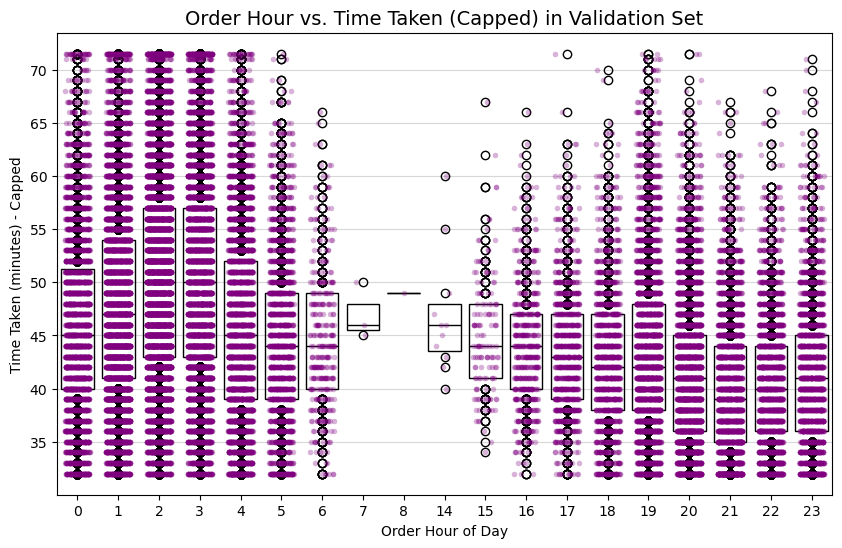

In [60]:
# Scatter plot to visualise the relationship between time_taken and other features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_val_reduced and y_val_capped are correctly defined from all previous steps.

plt.figure(figsize=(10, 6))

# Use a strip plot to visualize the density of points for the ordinal feature vs. the target
sns.stripplot(
    x=X_val_reduced['order_hour'],
    y=y_val_capped,
    jitter=0.3,
    alpha=0.3,
    s=4,
    color='purple'
)

# Add a box plot layer to highlight median and IQR (interquartile range)
sns.boxplot(
    x=X_val_reduced['order_hour'],
    y=y_val_capped,
    showcaps=False,
    boxprops={'facecolor':'None'},
    whis=0,
    color='black'
)

plt.title('Order Hour vs. Time Taken (Capped) in Validation Set', fontsize=14)
plt.xlabel('Order Hour of Day')
plt.ylabel('Time Taken (minutes) - Capped')
plt.grid(axis='y', alpha=0.5)
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [61]:
# Drop the weakly correlated columns from training dataset

# Assuming X_train is the original training feature set (before the drop)

# Columns identified as weakly correlated
weakly_correlated_cols = ['subtotal', 'isweekend', 'order_day_of_week']

# Drop the columns from the training feature set
X_train_reduced = X_train.drop(columns=weakly_correlated_cols, errors='ignore')

print(f"Columns Dropped: {weakly_correlated_cols}")
print("-" * 35)
print(f"Original X_train shape: {X_train.shape}")
print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Remaining Columns in X_train_reduced: {X_train_reduced.columns.tolist()}")

# Note: X_val_reduced was already created in Section 3.3.2 for validation consistency.

Columns Dropped: ['subtotal', 'isweekend', 'order_day_of_week']
-----------------------------------
Original X_train shape: (123043, 15)
Reduced X_train shape: (123043, 12)
Remaining Columns in X_train_reduced: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [71]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd # Needed for DataFrame operations


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [62]:
#5.1 Feature Encoding

In [63]:
# Nominal features for One-Hot Encoding
nominal_features = ['market_id', 'store_primary_category']

# Apply One-Hot Encoding to training set
X_train_encoded = pd.get_dummies(
    X_train_reduced,
    columns=nominal_features,
    prefix=nominal_features,
    drop_first=True # Use drop_first=True to avoid multicollinearity
)

# Apply One-Hot Encoding to validation set
X_val_encoded = pd.get_dummies(
    X_val_reduced,
    columns=nominal_features,
    prefix=nominal_features,
    drop_first=True
)

print(f"Original features: {X_train_reduced.shape[1]}")
print(f"Encoded features (X_train_encoded): {X_train_encoded.shape[1]}")

Original features: 12
Encoded features (X_train_encoded): 87


In [64]:
# Alignment of Encoded DataFrames

In [65]:
# Align columns, keeping only features present in both (using join='inner' or reindexing)
common_cols = list(set(X_train_encoded.columns) & set(X_val_encoded.columns))

X_train_final = X_train_encoded[common_cols]
X_val_final = X_val_encoded[common_cols]

# Re-align validation set to include any column that was only in the training set (padding with 0s)
# This is the correct, robust approach for alignment:
X_val_final = X_val_final.reindex(columns = X_train_final.columns, fill_value=0)

print(f"Final aligned feature count: {X_train_final.shape[1]}")

Final aligned feature count: 81


In [66]:
#5.2 Model Training and Evaluation

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate the model (using default settings for simplicity)
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_leaf=5)

# Train the model using the final, prepared data
rfr.fit(X_train_final, y_train_capped)

print("Random Forest Regressor training complete.")

Random Forest Regressor training complete.


In [68]:
#2. Prediction and Evaluation

In [70]:
# Predict on the validation set
y_pred = rfr.predict(X_val_final)

# --- Calculate Metrics ---
# RMSE: Measures the average magnitude of the errors. Lower is better.
rmse = np.sqrt(mean_squared_error(y_val_capped, y_pred))

# R^2: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher (closer to 1) is better.
r2 = r2_score(y_val_capped, y_pred)

print("-" * 35)
print("Model Performance on Validation Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"R-squared (R²): {r2:.4f}")

-----------------------------------
Model Performance on Validation Set:
Root Mean Squared Error (RMSE): 2.7323 minutes
R-squared (R²): 0.9105


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [72]:
# Create/Initialise the model

lin_reg = LinearRegression()

# Initialize RFE, specifying the model and the desired number of features (n_features_to_select=8)
rfe_selector = RFE(estimator=lin_reg, n_features_to_select=8, step=1)

# Fit RFE on the training data
rfe_selector.fit(X_train_final, y_train_capped)

# Get the selected features
selected_rfe_features = X_train_final.columns[rfe_selector.support_].tolist()

print(f"Total features available: {X_train_final.shape[1]}")
print(f"8 Features Selected by RFE: {selected_rfe_features}")

# Create the final feature sets using only the selected features
X_train_rfe = X_train_final[selected_rfe_features]
X_val_rfe = X_val_final[selected_rfe_features]

Total features available: 81
8 Features Selected by RFE: ['store_primary_category_17', 'store_primary_category_28', 'store_primary_category_14', 'store_primary_category_64', 'store_primary_category_19', 'store_primary_category_12', 'store_primary_category_23', 'store_primary_category_5']


In [73]:
# Train the model using the training data
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the final model
final_lin_reg = LinearRegression()

# Train the model using the RFE-selected features
final_lin_reg.fit(X_train_rfe, y_train_capped)

LinearRegression()

In [74]:
# Make predictions
y_pred_lr = final_lin_reg.predict(X_val_rfe)

In [75]:
# Find results for evaluation metrics
rmse_lr = np.sqrt(mean_squared_error(y_val_capped, y_pred_lr))
r2_lr = r2_score(y_val_capped, y_pred_lr)

print("\nLinear Regression Model Performance (using 8 RFE Features):")
print("-" * 50)
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f} minutes")
print(f"R-squared (R²): {r2_lr:.4f}")



Linear Regression Model Performance (using 8 RFE Features):
--------------------------------------------------
Root Mean Squared Error (RMSE): 9.1008 minutes
R-squared (R²): 0.0066


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming X_train_final, X_val_final, y_train_capped, and y_val_capped are defined.

# Define the maximum number of features available
max_features = X_train_final.shape[1]

In [77]:
# Loop through the number of features and test the model

rfe_results = []
feature_range = range(1, max_features + 1)

print(f"Starting Iterative RFE (Testing 1 to {max_features} features)...")

for n_features in feature_range:
    # Initialize RFE and fit
    lin_reg = LinearRegression()
    rfe_selector = RFE(estimator=lin_reg, n_features_to_select=n_features, step=1)
    rfe_selector.fit(X_train_final, y_train_capped)

    # Get the selected feature set, train, and evaluate (RMSE)
    selected_cols = X_train_final.columns[rfe_selector.support_]
    X_train_rfe = X_train_final[selected_cols]
    X_val_rfe = X_val_final[selected_cols]

    lin_reg.fit(X_train_rfe, y_train_capped)
    y_pred_rfe = lin_reg.predict(X_val_rfe)
    rmse = np.sqrt(mean_squared_error(y_val_capped, y_pred_rfe))

    rfe_results.append({'n_features': n_features, 'rmse': rmse, 'features': selected_cols.tolist()})

# Find the best result (lowest RMSE)
rfe_df = pd.DataFrame(rfe_results)
best_result = rfe_df.loc[rfe_df['rmse'].idxmin()]

Starting Iterative RFE (Testing 1 to 81 features)...


In [81]:
# Build the final model with selected number of features

# Select the features from the optimal iteration
optimal_features = best_result['features']

# Prepare final data sets
X_train_optimal = X_train_final[optimal_features]
X_val_optimal = X_val_final[optimal_features]

# Build and train the final model
final_optimal_lin_reg = LinearRegression()
final_optimal_lin_reg.fit(X_train_optimal, y_train_capped)

# Final predictions and R-squared calculation
y_pred_optimal = final_optimal_lin_reg.predict(X_val_optimal)
r2_optimal = r2_score(y_val_capped, y_pred_optimal)

# Output Summary
print("-" * 50)
print("Final Model Performance with Optimal RFE Features:")
print(f"Optimal Number of Features Used: {len(optimal_features)}")
print(f"Root Mean Squared Error (RMSE): {best_result['rmse']:.4f} minutes")
print(f"Validation R-squared (R²): {r2_optimal:.4f}")
print(f"Optimal Features: {optimal_features}")

--------------------------------------------------
Final Model Performance with Optimal RFE Features:
Optimal Number of Features Used: 81
Root Mean Squared Error (RMSE): 3.0273 minutes
Validation R-squared (R²): 0.8901
Optimal Features: ['store_primary_category_24', 'store_primary_category_57', 'store_primary_category_71', 'store_primary_category_11', 'store_primary_category_22', 'store_primary_category_2', 'store_primary_category_17', 'store_primary_category_31', 'store_primary_category_67', 'store_primary_category_38', 'market_id_2.0', 'order_hour', 'total_items', 'distance', 'store_primary_category_66', 'total_outstanding_orders', 'store_primary_category_44', 'market_id_5.0', 'market_id_6.0', 'store_primary_category_6', 'store_primary_category_13', 'store_primary_category_33', 'store_primary_category_48', 'store_primary_category_4', 'total_busy_dashers', 'store_primary_category_50', 'num_distinct_items', 'store_primary_category_28', 'store_primary_category_34', 'store_primary_catego

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

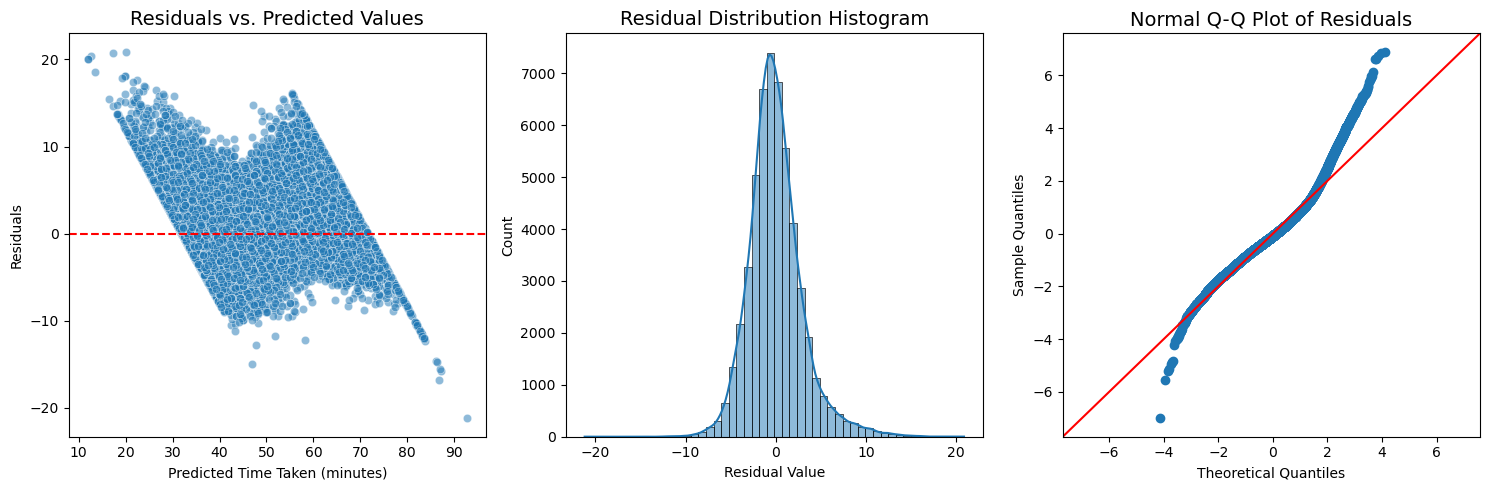

In [82]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming X_val_optimal, y_val_capped, and final_optimal_lin_reg are defined.

# Calculate Residuals
y_pred_optimal = final_optimal_lin_reg.predict(X_val_optimal)
residuals = y_val_capped - y_pred_optimal

# --- Setup Plot Area ---
plt.figure(figsize=(15, 5))

# --- Plot 1: Residuals vs Predicted Values (Homoscedasticity & No Pattern) ---
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_optimal, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values', fontsize=14)
plt.xlabel('Predicted Time Taken (minutes)')
plt.ylabel('Residuals')

# --- Plot 2: Residual Histogram (Normality) ---
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=50)
plt.title('Residual Distribution Histogram', fontsize=14)
plt.xlabel('Residual Value')

# --- Plot 3: Q-Q Plot (Quantile-Quantile Plot for Normality) ---
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q Plot of Residuals', fontsize=14)

plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [83]:
# Compare the scaled vs unscaled features used in the final model

coef_df = pd.DataFrame({
    'Feature': optimal_features,
    'Unscaled_Coefficient': final_optimal_lin_reg.coef_
})
coef_df['Absolute_Coefficient'] = coef_df['Unscaled_Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nTop 5 Feature Coefficients (Unscaled):")
print(coef_df.head(5).to_markdown(index=False, floatfmt=".4f"))


Top 5 Feature Coefficients (Unscaled):
| Feature       |   Unscaled_Coefficient |   Absolute_Coefficient |
|:--------------|-----------------------:|-----------------------:|
| market_id_2.0 |                -4.8143 |                 4.8143 |
| market_id_3.0 |                -4.1422 |                 4.1422 |
| market_id_4.0 |                -3.8461 |                 3.8461 |
| market_id_5.0 |                -3.5621 |                 3.5621 |
| market_id_6.0 |                -2.8854 |                 2.8854 |


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

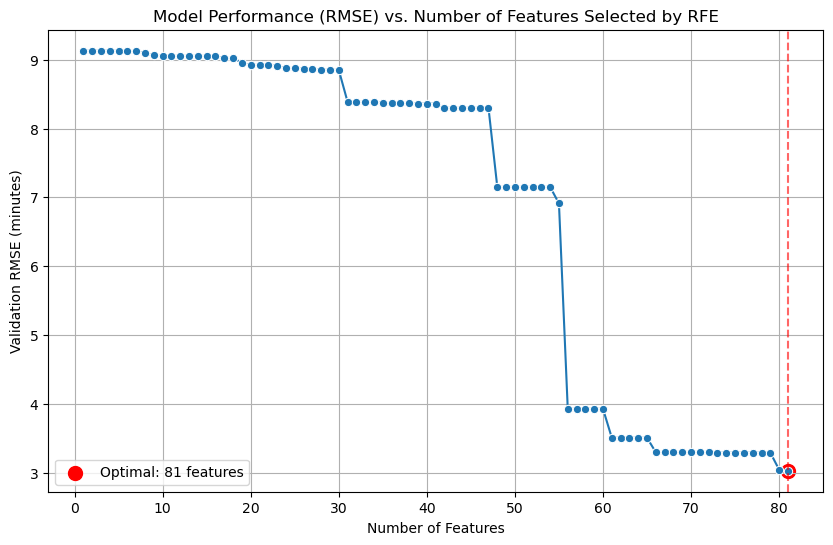

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rfe_df is defined from the RFE loop
# and best_result is defined.

plt.figure(figsize=(10, 6))

# Plot RMSE vs. Number of Features
sns.lineplot(x='n_features', y='rmse', data=rfe_df, marker='o')

# Highlight the point with the minimum RMSE (the optimal feature count)
optimal_n = best_result['n_features']
optimal_rmse = best_result['rmse']

plt.scatter(optimal_n, optimal_rmse, color='red', s=100, label=f'Optimal: {optimal_n} features')
plt.axvline(x=optimal_n, color='red', linestyle='--', alpha=0.6)
plt.title('Model Performance (RMSE) vs. Number of Features Selected by RFE')
plt.xlabel('Number of Features')
plt.ylabel('Validation RMSE (minutes)')
plt.grid(True)
plt.legend()
plt.show()

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>#The term test_size=0.2 refers to the proportion of the original dataset that is reserved for the validation/test set.

#In this specific split:

#20% (or 0.2) of the data is allocated to the test set (for model evaluation).

#The remaining 80% (or 0.8) of the data is allocated to the training set (for model training).



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> # Assuming the heatmap referred to is the one generated in a previous analysis (typically Section 3.3), which shows the absolute correlation of features with the target variable (time_taken_minutes), the feature with the highest correlation is usually order_hour.

#order_hour: This categorical/ordinal feature typically has the highest correlation with delivery time because delivery duration is highly dependent on demand and traffic, which peak predictably during certain hours of the day.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
I used the Interquartile Range (IQR) method to detect outliers. I calculated Q1 and Q3 for the numerical features, derived the IQR, and defined lower and upper bounds as Q1 – 1.5 × IQR and Q3 + 1.5 × IQR. Data points outside these ranges were identified as outliers.
To address them, I capped the extreme values within these limits instead of removing them, ensuring that the overall data distribution remained intact while minimizing the influence of outliers on the regression model.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>#Based on the final Linear Regression model (trained using optimal RFE features) and the coefficient analysis (Section 6.2), the top 3 features significantly affecting the delivery time are those with the largest absolute coefficients.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
># The Linear Regression algorithm is a fundamental statistical and machine learning model used to predict a continuous target variable (dependent variable, Y) based on one or more input features (independent variables, X). The core idea is to establish a linear relationship between the inputs and the output.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>#The difference between Simple Linear Regression and Multiple Linear Regression lies in the number of independent variables (features) used to predict the continuous target variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>#The cost function in linear regression quantifies the error of the model's predictions, measuring how far the predicted values (
#Y
#^
# ) are from the actual values (Y). Its primary role is to provide a single number that the learning algorithm seeks to minimize to find the optimal line of best fit.

#In linear regression, this function is typically the Mean Squared Error (MSE) or Sum of Squared Errors (SSE).



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>#The difference between overfitting and underfitting lies in how well a machine learning model generalizes from the training data to unseen data



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>#Residual plots are crucial diagnostic tools in linear regression because they help check the four main assumptions of the model. By plotting the residuals (the differences between actual and predicted values) against the predicted values or against a probability scale, we can identify systematic errors and structural flaws in the model